<a href="https://colab.research.google.com/github/venkatvalluri2004/Cognifyz-Technologies_Task/blob/main/1credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
import warnings as war
war.filterwarnings('ignore')


In [4]:
df = pd.read_csv('train.csv')
df.head(10)

ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12                    NaN                  3  ...   
2  Scientist      19114.12                    NaN                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4  Scientist      19114.12            1824.843333                  3  ...   
5  Scientist      19114.12                    NaN                  3  ...   
6  Scientist      19114.12            1824.843333                  3  ...   
7  Scientist      19114.12            1824.843333                  3  ...   
8    _______      34847.84            3037.986667                  2  ...   
9    Teacher      34847.84            3037.986667                  2  ...   

   Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0           _            809.98                26.822620   
1        Good            809.98                31.944960   
2        Good            809.98                28.609352   
3        Good            809.98                31.377862   
4        Good            809.98                24.797347   
5        Good            809.98                27.262259   
6        Good            809.98                22.537593   
7        Good            809.98                23.933795   
8        Good            605.03                24.464031   
9        Good            605.03                38.550848   

      Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0  22 Years and 1 Months                     No           49.574949   
1                    NaN                     No           49.574949   
2  22 Years and 3 Months                     No           49.574949   
3  22 Years and 4 Months                     No           49.574949   
4  22 Years and 5 Months                     No           49.574949   
5  22 Years and 6 Months                     No           49.574949   
6  22 Years and 7 Months                     No           49.574949   
7                    NaN                     No           49.574949   
8  26 Years and 7 Months                     No           18.816215   
9  26 Years and 8 Months                     No           18.816215   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   
5      62.430172331195294                            !@9#%8   
6       178.3440674122349    Low_spent_Small_value_payments   
7      24.785216509052056  High_spent_Medium_value_payments   
8        104.291825168246    Low_spent_Small_value_payments   
9       40.39123782853101   High_spent_Large_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good  
5   340.4792117872

In [5]:
df.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           14330.000000       16861.000000     16861.000000   
mean             4302.357054          17.744914        23.616986   
std              3220.323501         121.272573       134.040909   
min               355.208333           0.000000         0.000000   
25%              1663.025833           3.000000         4.000000   
50%              3216.025833           6.000000         6.000000   
75%              6080.968958           8.000000         7.000000   
max             14855.930000        1789.000000      1486.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count   16861.000000         16861.000000          16517.000000   
mean       71.900065            21.178341             25.801356   
std       465.250341            14.707719            181.768004   
min         1.000000            -5.000000              0.000000   
25%         7.000000            10.000000              3.000000   
50%        14.000000            18.000000              5.000000   
75%        20.000000            28.000000              9.000000   
max      5747.000000            67.000000           2592.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count              16861.000000         16861.000000  
mean                  32.296261          1390.955131  
std                    5.138845          8205.903857  
min                   20.000000             0.000000  
25%                   28.011655            30.201032  
50%                   32.329492            70.479478  
75%                   36.527949           168.131731  
max                   50.000000         82256.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16861 entries, 0 to 16860
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16861 non-null  object 
 1   Customer_ID               16861 non-null  object 
 2   Month                     16861 non-null  object 
 3   Name                      15193 non-null  object 
 4   Age                       16861 non-null  object 
 5   SSN                       16861 non-null  object 
 6   Occupation                16861 non-null  object 
 7   Annual_Income             16861 non-null  object 
 8   Monthly_Inhand_Salary     14330 non-null  float64
 9   Num_Bank_Accounts         16861 non-null  int64  
 10  Num_Credit_Card           16861 non-null  int64  
 11  Interest_Rate             16861 non-null  int64  
 12  Num_of_Loan               16861 non-null  object 
 13  Type_of_Loan              15005 non-null  object 
 14  Delay_

In [7]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        1668
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       2531
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                1856
Delay_from_due_date            0
Num_of_Delayed_Payment      1191
Changed_Credit_Limit           0
Num_Credit_Inquiries         344
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1550
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      729
Payment_Behaviour              1
Monthly_Balance              215
Credit_Score                   1
dtype: int64

In [8]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:
df.shape

(16861, 28)

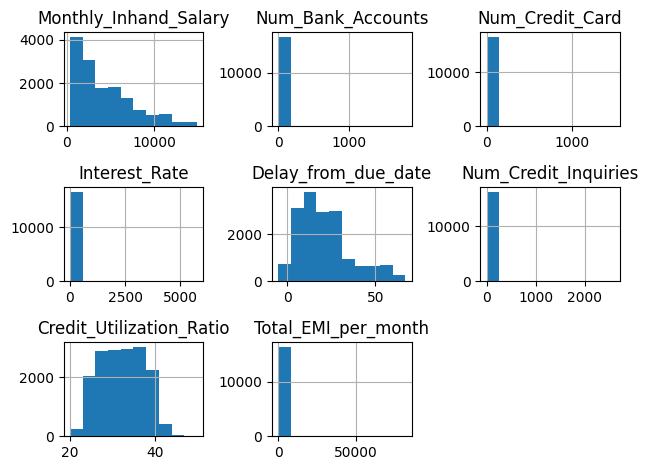

In [10]:
df.hist()
plt.tight_layout()

In [11]:
plt.figure(figsize=(6.4, 4.8))  # Size in inches, where 1 inch = 100 pixels
plt.show()

<Figure size 640x480 with 0 Axes>

In [12]:
df = df.drop(columns=['ID','Customer_ID','Name','Age','SSN'])
df

Month Occupation Annual_Income  Monthly_Inhand_Salary  \
0       January  Scientist      19114.12            1824.843333   
1      February  Scientist      19114.12                    NaN   
2         March  Scientist      19114.12                    NaN   
3         April  Scientist      19114.12                    NaN   
4           May  Scientist      19114.12            1824.843333   
...         ...        ...           ...                    ...   
16856   January    _______      27288.85            2524.070833   
16857  February  Developer      27288.85                    NaN   
16858     March  Developer      27288.85            2524.070833   
16859     April  Developer      27288.85                    NaN   
16860       May  Developer      27288.85            2524.070833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                      3                4              3           4   
1                      3                4              3           4   
2                      3                4              3           4   
3                      3                4              3           4   
4                      3                4              3           4   
...                  ...              ...            ...         ...   
16856                  5                3              5           4   
16857                  5                3              5           4   
16858                  5                3              5           4   
16859                  5                3              5           4   
16860                  5                3              5           4   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
...                                                  ...                  ...   
16856  Payday Loan, Credit-Builder Loan, Credit-Build...                    9   
16857  Payday Loan, Credit-Builder Loan, Credit-Build...                    9   
16858  Payday Loan, Credit-Builder Loan, Credit-Build...                   11   
16859  Payday Loan, Credit-Builder Loan, Credit-Build...                    6   
16860  Payday Loan, Credit-Builder Loan, Credit-Build...                   12   

       ... Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...          _           809.98                 26.822620   
1      ...       Good           809.98                 31.944960   
2      ...       Good           809.98                 28.609352   
3      ...       Good           809.98                 31.377862   
4      ...       Good           809.98                 24.797347   
...    ...        ...              ...                       ...   
16856  ...   Standard          1354.13                 24.491286   
16857  ...   Standard          1354.13                 29.684491   
16858  ...          _          1354.13                 26.256459   
16859  ...   Standard          1354.13                 32.911280   
16860  ...   Standard          1354.13                 34.870039   

          Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0      22 Years and 1 Months                    No            49.574949   
1                        NaN                    No            49.574949   
2      22 Years and 3 Months                    No            49.574949   
3      22 Years and 4 Months                    No            49.574949   
4      22 Years and 5 Months                    No            49.574949   
...                      ...                   ...                  ...   
16856  19 Years and 1 Mon

In [13]:
df = df.dropna()
df.isnull().sum()

Month                       0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

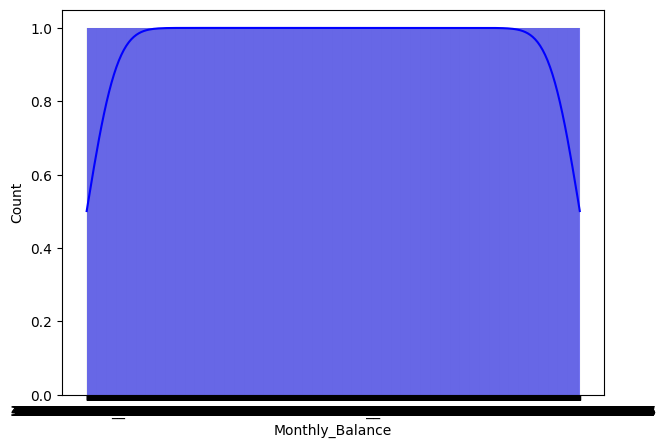

In [93]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Monthly_Balance", kde=True,bins=30,color="blue")
plt.show()

In [14]:
df.drop(df[df["Occupation"]=='_______'].index,inplace=True)
df.drop(df[df["Credit_Mix"]=='_'].index,inplace=True)
df

Month Occupation Annual_Income  Monthly_Inhand_Salary  \
6          July  Scientist      19114.12            1824.843333   
9      February    Teacher      34847.84            3037.986667   
12          May    Teacher      34847.84            3037.986667   
13         June    Teacher      34847.84            3037.986667   
15       August    Teacher      34847.84            3037.986667   
...         ...        ...           ...                    ...   
16843     April    Manager     10640.355            1115.696250   
16846      July    Manager     10640.355            1115.696250   
16848   January    Teacher     160454.04           13627.170000   
16849  February    Teacher     160454.04           13627.170000   
16854      July    Teacher     160454.04           13627.170000   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
6                      3                4              3           4   
9                      2                4              6           1   
12                     2                4              6           1   
13                     2                4              6           1   
15                     2                4              6           1   
...                  ...              ...            ...         ...   
16843                  6                3             13           2   
16846                  6                3             13           2   
16848                  3                7              2           2   
16849                  3                7              2           2   
16854                  3                7              2           2   

                                            Type_of_Loan  Delay_from_due_date  \
6      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
9                                    Credit-Builder Loan                    7   
12                                   Credit-Builder Loan                    3   
13                                   Credit-Builder Loan                    3   
15                                   Credit-Builder Loan                    3   
...                                                  ...                  ...   
16843       Credit-Builder Loan, and Credit-Builder Loan                   12   
16846       Credit-Builder Loan, and Credit-Builder Loan                   12   
16848                     Not Specified, and Payday Loan                    6   
16849                     Not Specified, and Payday Loan                    6   
16854                     Not Specified, and Payday Loan                    2   

       ... Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
6      ...       Good           809.98                 22.537593   
9      ...       Good           605.03                 38.550848   
12     ...       Good           605.03                 34.977895   
13     ...       Good           605.03                 33.381010   
15     ...       Good           605.03                 32.933856   
...    ...        ...              ...                       ...   
16843  ...   Standard            76.19                 33.990961   
16846  ...   Standard            76.19                 31.493826   
16848  ...       Good           773.94                 40.697796   
16849  ...       Good           773.94                 31.547733   
16854  ...       Good           773.94                 39.192947   

           Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
6       22 Years and 7 Months                    No            49.574949   
9       26 Years and 8 Months                    No            18.816215   
12     26 Years and 11 Months                    No            18.816215   
13      27 Years and 0 Months                    No            18.816215   
15      27 Years and 2 Months                    No            18.816215   
...                       ...                   ...                  ...   
16843   23 Years a

In [15]:
df.Month.value_counts()

Month
January     948
February    940
August      939
July        938
May         930
March       925
April       920
June        908
Name: count, dtype: int64

In [16]:
df = df.applymap(lambda x:x.replace('_','_') if isinstance(x,str) else x)
df

Month Occupation Annual_Income  Monthly_Inhand_Salary  \
6          July  Scientist      19114.12            1824.843333   
9      February    Teacher      34847.84            3037.986667   
12          May    Teacher      34847.84            3037.986667   
13         June    Teacher      34847.84            3037.986667   
15       August    Teacher      34847.84            3037.986667   
...         ...        ...           ...                    ...   
16843     April    Manager     10640.355            1115.696250   
16846      July    Manager     10640.355            1115.696250   
16848   January    Teacher     160454.04           13627.170000   
16849  February    Teacher     160454.04           13627.170000   
16854      July    Teacher     160454.04           13627.170000   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
6                      3                4              3           4   
9                      2                4              6           1   
12                     2                4              6           1   
13                     2                4              6           1   
15                     2                4              6           1   
...                  ...              ...            ...         ...   
16843                  6                3             13           2   
16846                  6                3             13           2   
16848                  3                7              2           2   
16849                  3                7              2           2   
16854                  3                7              2           2   

                                            Type_of_Loan  Delay_from_due_date  \
6      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
9                                    Credit-Builder Loan                    7   
12                                   Credit-Builder Loan                    3   
13                                   Credit-Builder Loan                    3   
15                                   Credit-Builder Loan                    3   
...                                                  ...                  ...   
16843       Credit-Builder Loan, and Credit-Builder Loan                   12   
16846       Credit-Builder Loan, and Credit-Builder Loan                   12   
16848                     Not Specified, and Payday Loan                    6   
16849                     Not Specified, and Payday Loan                    6   
16854                     Not Specified, and Payday Loan                    2   

       ... Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
6      ...       Good           809.98                 22.537593   
9      ...       Good           605.03                 38.550848   
12     ...       Good           605.03                 34.977895   
13     ...       Good           605.03                 33.381010   
15     ...       Good           605.03                 32.933856   
...    ...        ...              ...                       ...   
16843  ...   Standard            76.19                 33.990961   
16846  ...   Standard            76.19                 31.493826   
16848  ...       Good           773.94                 40.697796   
16849  ...       Good           773.94                 31.547733   
16854  ...       Good           773.94                 39.192947   

           Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
6       22 Years and 7 Months                    No            49.574949   
9       26 Years and 8 Months                    No            18.816215   
12     26 Years and 11 Months                    No            18.816215   
13      27 Years and 0 Months                    No            18.816215   
15      27 Years and 2 Months                    No            18.816215   
...                       ...                   ...                  ...   
16843   23 Years a

In [17]:
df['Payment_Behaviour'].replace('!@9#%8',np.nan)
df

Month Occupation Annual_Income  Monthly_Inhand_Salary  \
6          July  Scientist      19114.12            1824.843333   
9      February    Teacher      34847.84            3037.986667   
12          May    Teacher      34847.84            3037.986667   
13         June    Teacher      34847.84            3037.986667   
15       August    Teacher      34847.84            3037.986667   
...         ...        ...           ...                    ...   
16843     April    Manager     10640.355            1115.696250   
16846      July    Manager     10640.355            1115.696250   
16848   January    Teacher     160454.04           13627.170000   
16849  February    Teacher     160454.04           13627.170000   
16854      July    Teacher     160454.04           13627.170000   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
6                      3                4              3           4   
9                      2                4              6           1   
12                     2                4              6           1   
13                     2                4              6           1   
15                     2                4              6           1   
...                  ...              ...            ...         ...   
16843                  6                3             13           2   
16846                  6                3             13           2   
16848                  3                7              2           2   
16849                  3                7              2           2   
16854                  3                7              2           2   

                                            Type_of_Loan  Delay_from_due_date  \
6      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
9                                    Credit-Builder Loan                    7   
12                                   Credit-Builder Loan                    3   
13                                   Credit-Builder Loan                    3   
15                                   Credit-Builder Loan                    3   
...                                                  ...                  ...   
16843       Credit-Builder Loan, and Credit-Builder Loan                   12   
16846       Credit-Builder Loan, and Credit-Builder Loan                   12   
16848                     Not Specified, and Payday Loan                    6   
16849                     Not Specified, and Payday Loan                    6   
16854                     Not Specified, and Payday Loan                    2   

       ... Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
6      ...       Good           809.98                 22.537593   
9      ...       Good           605.03                 38.550848   
12     ...       Good           605.03                 34.977895   
13     ...       Good           605.03                 33.381010   
15     ...       Good           605.03                 32.933856   
...    ...        ...              ...                       ...   
16843  ...   Standard            76.19                 33.990961   
16846  ...   Standard            76.19                 31.493826   
16848  ...       Good           773.94                 40.697796   
16849  ...       Good           773.94                 31.547733   
16854  ...       Good           773.94                 39.192947   

           Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
6       22 Years and 7 Months                    No            49.574949   
9       26 Years and 8 Months                    No            18.816215   
12     26 Years and 11 Months                    No            18.816215   
13      27 Years and 0 Months                    No            18.816215   
15      27 Years and 2 Months                    No            18.816215   
...                       ...                   ...                  ...   
16843   23 Years a

<Axes: xlabel='count', ylabel='Occupation'>

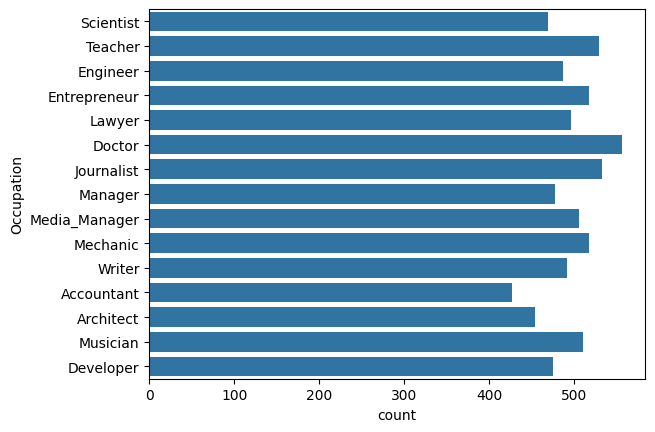

In [18]:
sns.countplot(y='Occupation',data=df)

In [19]:
cat = ['Month','Occupation','Type_of_Loan','Credit_Mix','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour']
le = LabelEncoder()
for col in cat:
    df[col] = le.fit_transform(df[col])
df

Month  Occupation Annual_Income  Monthly_Inhand_Salary  \
6          4          12      19114.12            1824.843333   
9          2          13      34847.84            3037.986667   
12         7          13      34847.84            3037.986667   
13         5          13      34847.84            3037.986667   
15         1          13      34847.84            3037.986667   
...      ...         ...           ...                    ...   
16843      0           8     10640.355            1115.696250   
16846      4           8     10640.355            1115.696250   
16848      3          13     160454.04           13627.170000   
16849      2          13     160454.04           13627.170000   
16854      4          13     160454.04           13627.170000   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
6                      3                4              3           4   
9                      2                4              6           1   
12                     2                4              6           1   
13                     2                4              6           1   
15                     2                4              6           1   
...                  ...              ...            ...         ...   
16843                  6                3             13           2   
16846                  6                3             13           2   
16848                  3                7              2           2   
16849                  3                7              2           2   
16854                  3                7              2           2   

       Type_of_Loan  Delay_from_due_date  ... Credit_Mix Outstanding_Debt  \
6                29                    3  ...          1           809.98   
9               141                    7  ...          1           605.03   
12              141                    3  ...          1           605.03   
13              141                    3  ...          1           605.03   
15              141                    3  ...          1           605.03   
...             ...                  ...  ...        ...              ...   
16843           287                   12  ...          2            76.19   
16846           287                   12  ...          2            76.19   
16848           838                    6  ...          1           773.94   
16849           838                    6  ...          1           773.94   
16854           838                    2  ...          1           773.94   

       Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
6                     22.537593                 187                     1   
9                     38.550848                 236                     1   
12                    34.977895                 229                     1   
13                    33.381010                 238                     1   
15                    32.933856                 242                     1   
...                         ...                 ...                   ...   
16843                 33.990961                 200                     2   
16846                 31.493826                 193                     2   
16848                 40.697796                 223                     0   
16849                 31.547733                 224                     1   
16854                 39.192947                 227                     0   

       Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
6                49.574949        178.3440674122349                  6   
9                18.816215        40.39123782853101                  1   
12               18.816215       130.11542024292334                  6   
13               18.816215       43.477190144355745                  1   
15               18.816215       218.90434353388733                  6   
...                    ...                      ...                

<Axes: xlabel='count', ylabel='Month'>

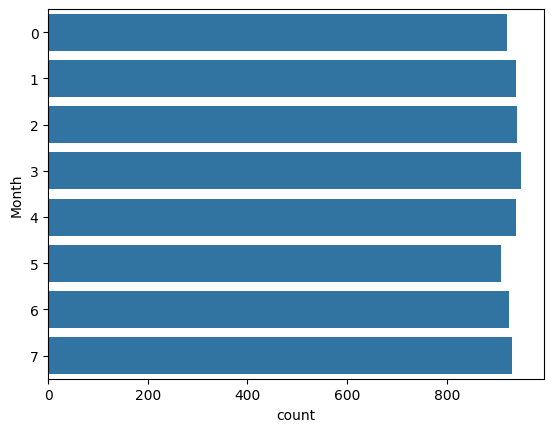

In [20]:
sns.countplot(y='Month',data=df)

<Axes: xlabel='count', ylabel='Type_of_Loan'>

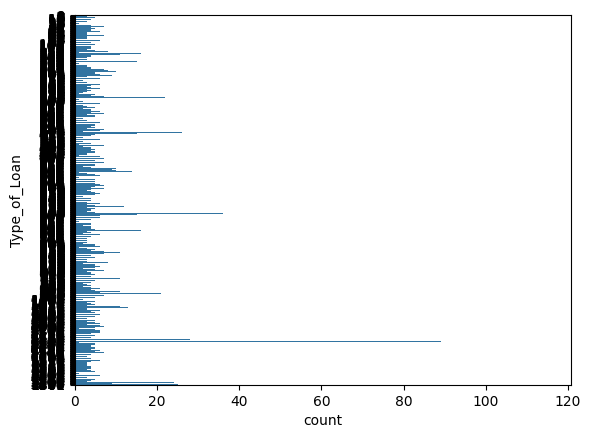

In [21]:
sns.countplot(y='Type_of_Loan',data=df)

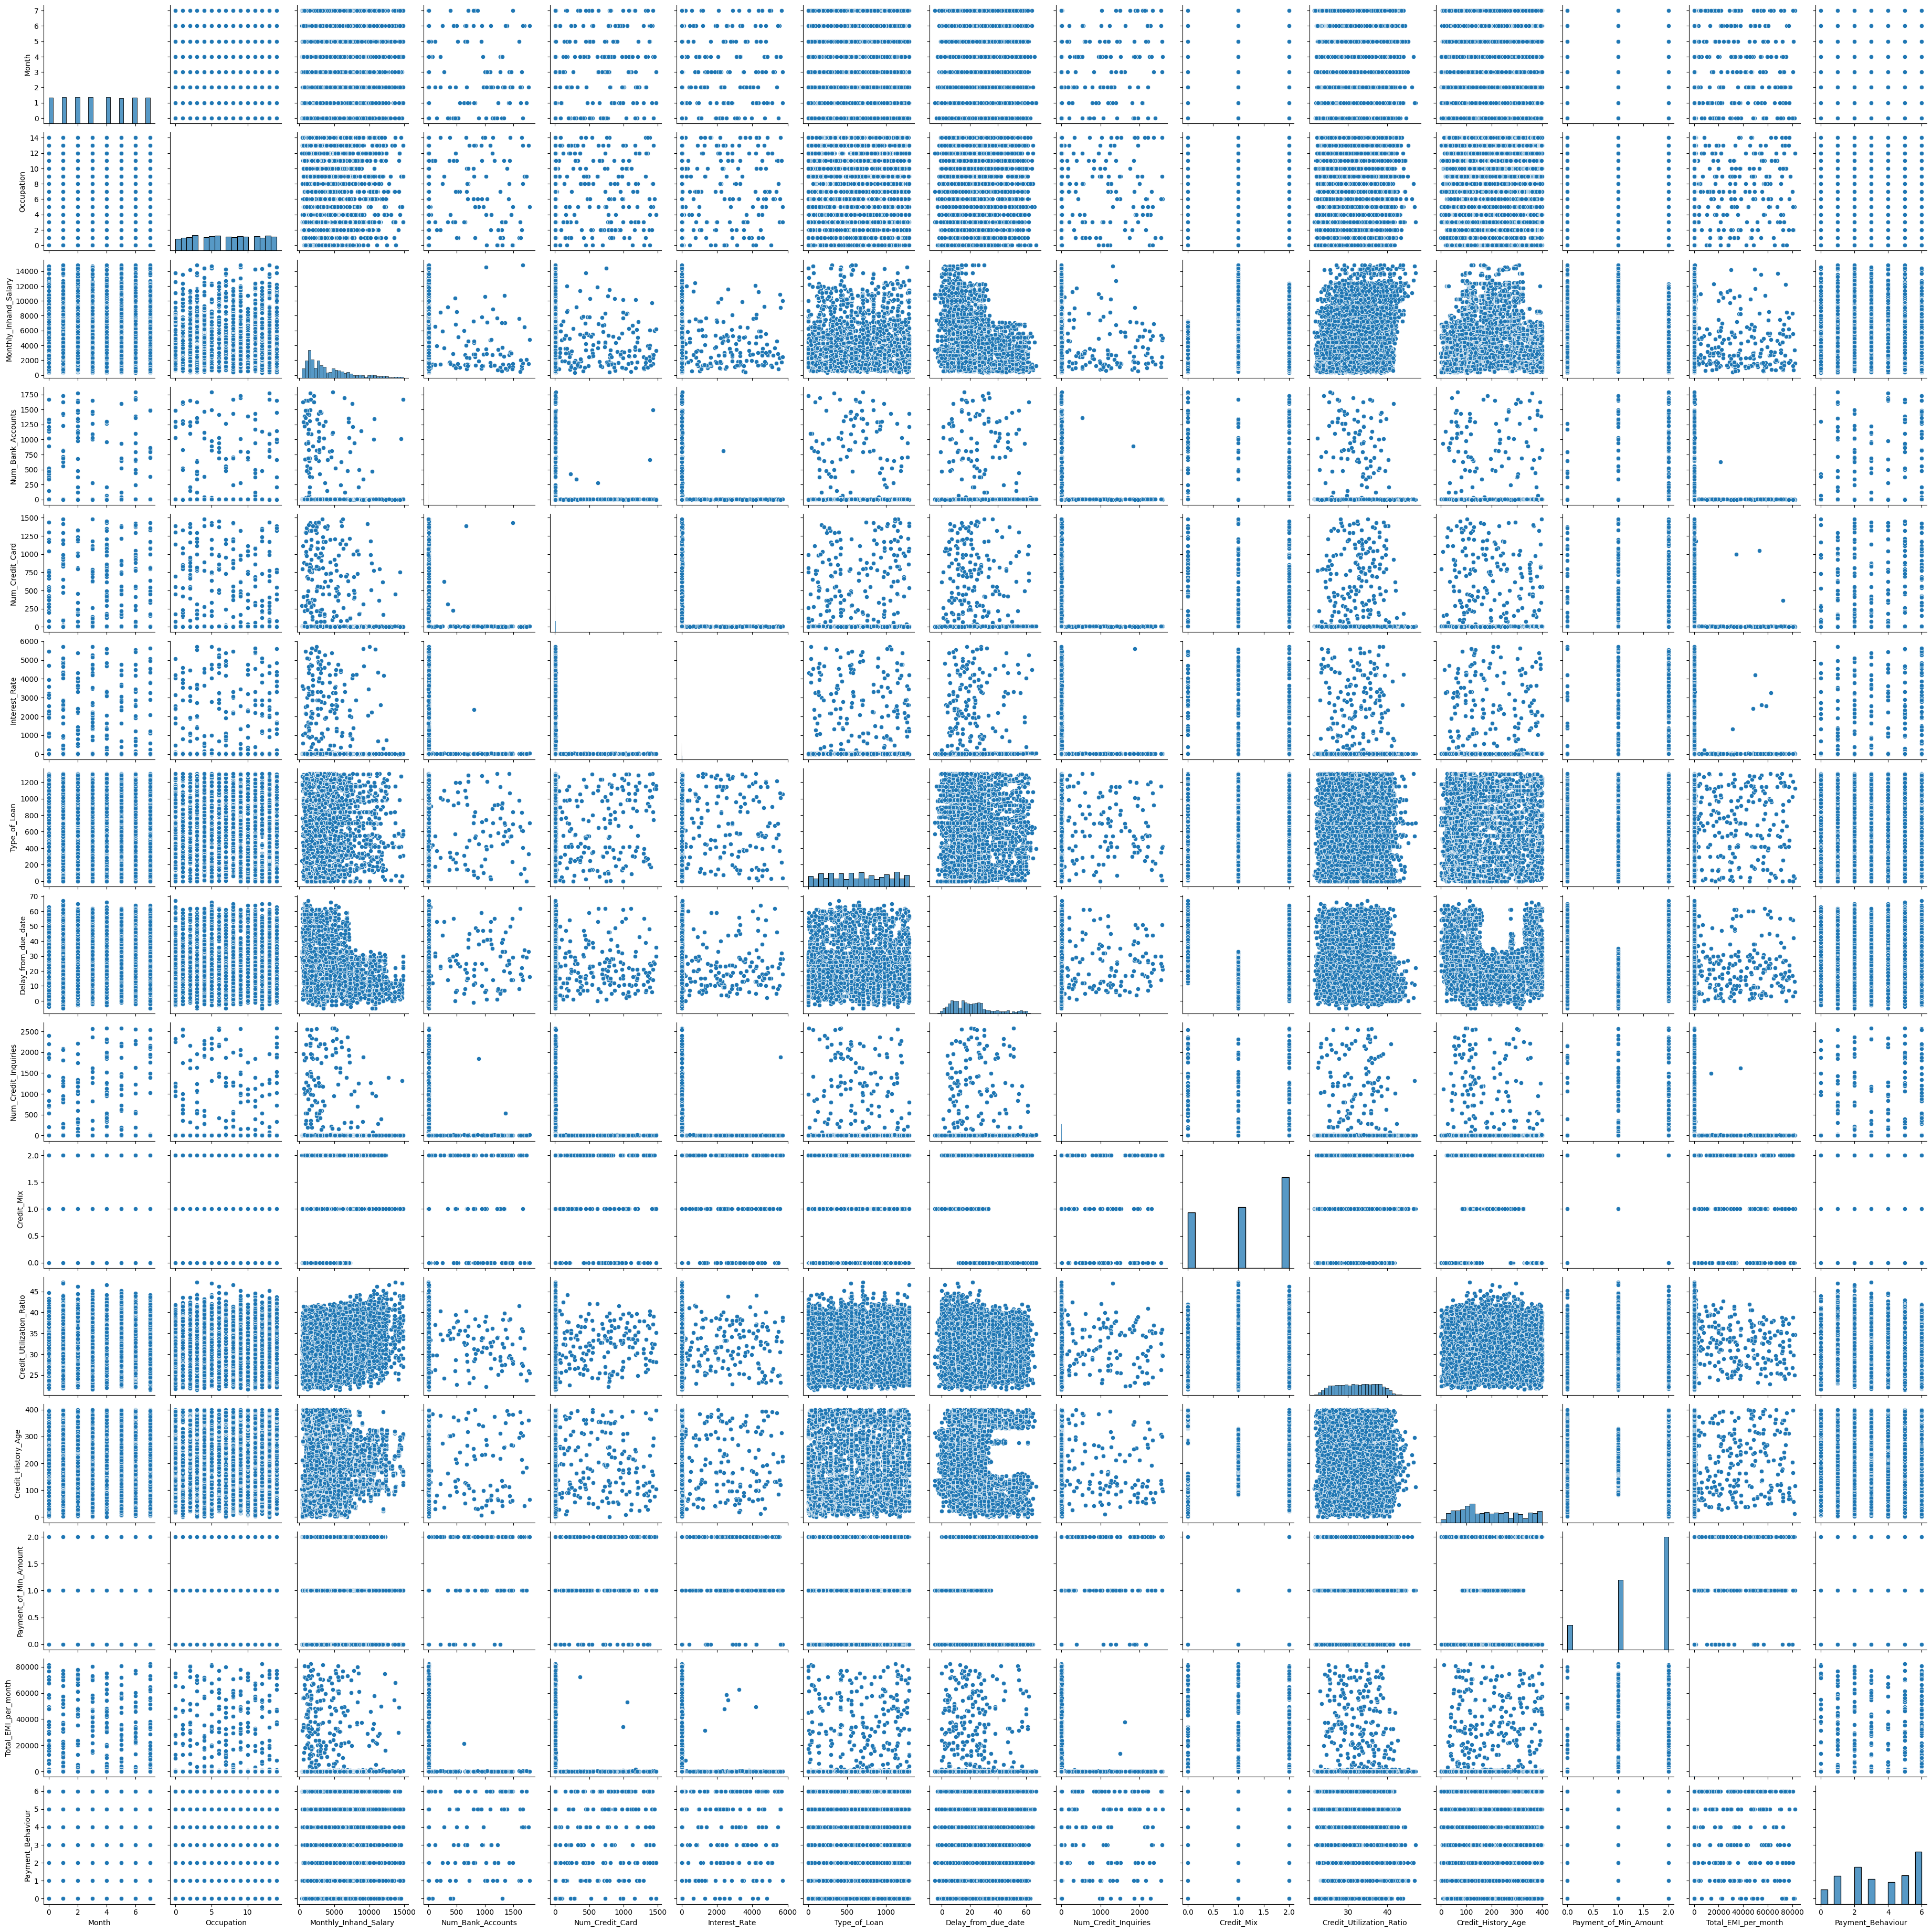

In [22]:
sns.pairplot(df)

In [23]:
x = df.drop(columns='Credit_Score')
y = df['Credit_Score']

In [64]:
x = x.replace('',np.nan).astype(float)

In [65]:
x.isnull().sum()

Month                         0
Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary         0
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Type_of_Loan                  0
Delay_from_due_date           0
Num_of_Delayed_Payment        0
Changed_Credit_Limit        164
Num_Credit_Inquiries          0
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age            0
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly       0
Payment_Behaviour             0
Monthly_Balance               0
dtype: int64

In [70]:
x['Changed_Credit_Limit'].fillna(0,inplace=True)

In [71]:
x.isnull().sum()

Month                       0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [73]:
x

Month  Occupation  Annual_Income  Monthly_Inhand_Salary  \
6      0.221779    1.152127      -0.110684              -0.724982   
9     -0.652888    1.386921      -0.099917              -0.336857   
12     1.533780    1.386921      -0.099917              -0.336857   
13     0.659112    1.386921      -0.099917              -0.336857   
15    -1.090222    1.386921      -0.099917              -0.336857   
...         ...         ...            ...                    ...   
16843 -1.527555    0.212948      -0.116483              -0.951861   
16846  0.221779    0.212948      -0.116483              -0.951861   
16848 -0.215555    1.386921      -0.013959               3.050968   
16849 -0.652888    1.386921      -0.013959               3.050968   
16854  0.221779    1.386921      -0.013959               3.050968   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
6              -0.121584        -0.143993      -0.150790    -0.009597   
9              -0.130102        -0.143993      -0.144146    -0.053799   
12             -0.130102        -0.143993      -0.144146    -0.053799   
13             -0.130102        -0.143993      -0.144146    -0.053799   
15             -0.130102        -0.143993      -0.144146    -0.053799   
...                  ...              ...            ...          ...   
16843          -0.096032        -0.152064      -0.128643    -0.039065   
16846          -0.096032        -0.152064      -0.128643    -0.039065   
16848          -0.121584        -0.119782      -0.153005    -0.039065   
16849          -0.121584        -0.119782      -0.153005    -0.039065   
16854          -0.121584        -0.119782      -0.153005    -0.039065   

       Type_of_Loan  Delay_from_due_date  ...  Num_Credit_Inquiries  \
6         -1.646961            -1.262857  ...             -0.120138   
9         -1.350538            -0.996855  ...             -0.131152   
12        -1.350538            -1.262857  ...             -0.131152   
13        -1.350538            -1.262857  ...             -0.131152   
15        -1.350538            -1.262857  ...             -0.131152   
...             ...                  ...  ...                   ...   
16843     -0.964129            -0.664353  ...              2.793105   
16846     -0.964129            -0.664353  ...             -0.103617   
16848      0.494168            -1.063356  ...             -0.131152   
16849      0.494168            -1.063356  ...             -0.131152   
16854      0.494168            -1.329358  ...             -0.131152   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
6       -0.205636         -0.559069                 -1.914932   
9       -0.205636         -0.729176                  1.248231   
12      -0.205636         -0.729176                  0.542451   
13      -0.205636         -0.729176                  0.227012   
15      -0.205636         -0.729176                  0.138684   
...           ...               ...                       ...   
16843    1.009901         -1.168111                  0.347498   
16846    1.009901         -1.168111                 -0.145771   
16848   -0.205636         -0.588982                  1.672326   
16849   -0.205636         -0.588982                 -0.135123   
16854   -0.205636         -0.588982                  1.375067   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
6               -0.031475              -0.608902            -0.156801   
9                0.409493              -0.608902            -0.160832   
12               0.346498              -0.608902            -0.160832   
13               0.427492              -0.608902            -0.160832   
15               0.463489              -0.608902            -0.160832   
...                   ...                    ...                  ...   
16843            0.085517               0.828987            -0.161029   
16846            0.022521               0.828987            -0.161029   
16848        

In [74]:
for column in x.select_dtypes(include=['object']).columns:
    x[column] = x[column].str.replace('_', '')

for column in x.select_dtypes(include=['object']).columns:
    try:
        x[column] = pd.to_numeric(x[column])
    except ValueError:
        pass


scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns, index=x.index)

In [75]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (5958, 22)
x_test shape: (1490, 22)
y_train shape: (5958,)
y_test shape: (1490,)


In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [77]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
Rmodel = RandomForestClassifier(n_estimators=100,random_state=42)
Rmodel.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [78]:
predict = Rmodel.predict(x_test)
predict

array(['Standard', 'Standard', 'Standard', ..., 'Good', 'Poor', 'Good'],
      dtype=object)

In [79]:
Rscore = accuracy_score(y_test,predict)*100
Rscore

77.71812080536913

In [80]:
cm = confusion_matrix(y_test,predict)
cm

array([[178,   0,  72],
       [  4, 383,  98],
       [ 55, 103, 597]])

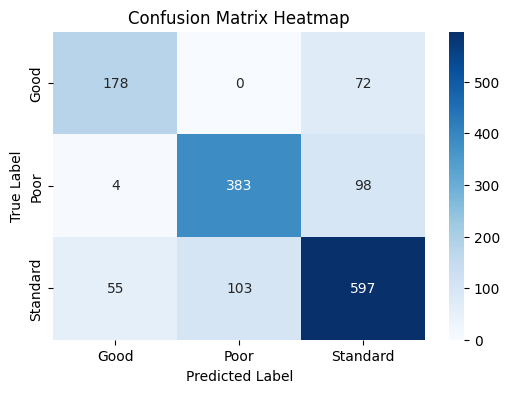

In [81]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [82]:
Emodel = ExtraTreesClassifier(n_estimators=100,random_state=40)
Emodel.fit(x_train,y_train)

ExtraTreesClassifier(random_state=40)

In [83]:
Epredict = Emodel.predict(x_test)
Epredict


array(['Standard', 'Standard', 'Standard', ..., 'Good', 'Poor', 'Good'],
      dtype=object)

In [84]:
Escore = accuracy_score(y_test,Epredict)*100
Escore

77.04697986577182

In [90]:
Ecm = confusion_matrix(y_test,Epredict)
Ecm

array([[179,   0,  71],
       [  8, 373, 104],
       [ 60,  99, 596]])

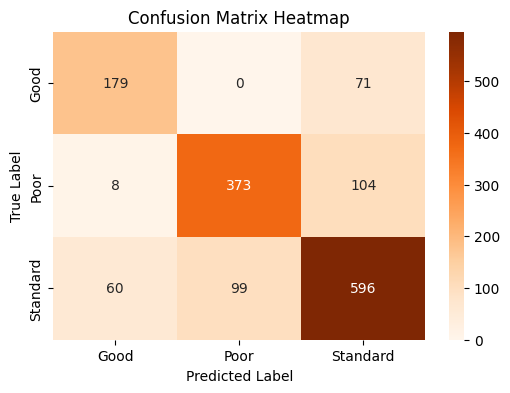

In [91]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))
sns.heatmap(Ecm, annot=True, fmt="d", cmap="Oranges",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [92]:
Amodel = AdaBoostClassifier(n_estimators=100)
Amodel.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [95]:
Apredict = Amodel.predict(x_test)
Apredict

array(['Standard', 'Standard', 'Standard', ..., 'Standard', 'Poor',
       'Standard'], dtype=object)

In [96]:
Ascore = accuracy_score(y_test,Apredict)*100
Ascore

61.54362416107383

In [97]:
Acm = confusion_matrix(y_test,Apredict)
Acm

array([[ 96,   7, 147],
       [ 10, 256, 219],
       [ 49, 141, 565]])

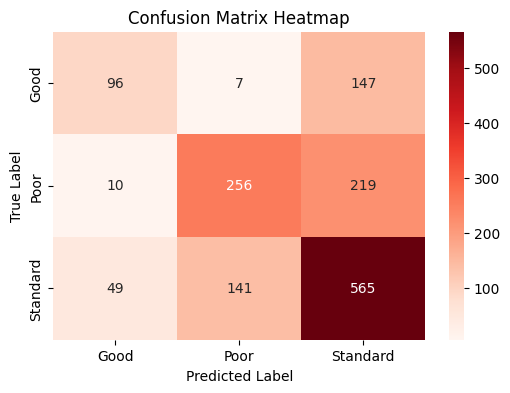

In [98]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))
sns.heatmap(Acm, annot=True, fmt="d", cmap="Reds",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [99]:
from sklearn.svm import SVC
smodel = SVC()
smodel.fit(x_train,y_train)

SVC()

In [100]:
spredict = smodel.predict(x_test)
spredict

array(['Standard', 'Standard', 'Standard', ..., 'Standard', 'Poor',
       'Standard'], dtype=object)

In [101]:
Sscore = accuracy_score(y_test,spredict)*100
Sscore

66.97986577181209

In [102]:
scm = confusion_matrix(y_test,spredict)
scm

array([[174,   6,  70],
       [ 43, 255, 187],
       [103,  83, 569]])

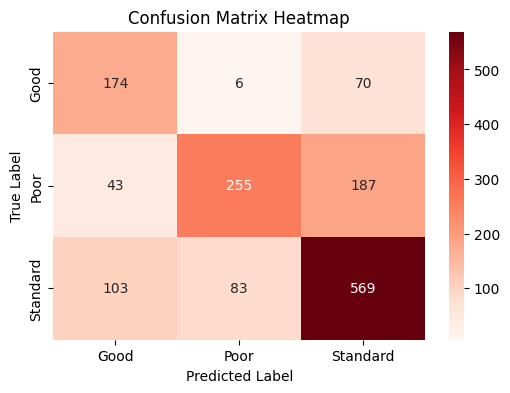

In [103]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))
sns.heatmap(scm, annot=True, fmt="d", cmap="Reds",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()